# Data Assimilation


James Percival
j.percival@imperial.ac.uk


Weather forecasting (AKA Numerical Weather Prediction or NWP) is one topic where there is a continuous, operational need to optimize and invert from observational data in order to generate accurate initial conditions from which to run forecasting models. As such it has a long and particular history of its own in generating inversion and assimilation techniques, many of them based on a probablistic understanding of error.

## Probability Recap

Since the rest of this lecture will be justified by a probablistic view of the universe, we will begin with a swift recap of some core probability theory and of the notation I will use in the rest of this lecture.

### Discrete Probability

#### Probabilities, expectation, averages, variance and standard deviation

The classical definition of the probabliity of an event is the ratio of the number of cases in which the event happens over the total number of cases. So, for standard 6 sided dice we have

$$ \mbox{possible results} = \{1, 2, 3, 4, 5, 6\} $$

$$ \mbox{results divisible by 3} = \{3, 6\}$$

$$ P(\mbox{result divisible by 3}) = \frac{2}{6} \approx 0.3333 $$

In [1]:
import random
def d6():
    """A Python implementation of a six sized dice"""
    return random.randint(1,6)

# Now to perform 1000 trials
success = 0
for i in range(1000):
    success += (d6()%3 == 0)
    
# return the result as a ratio
print(success/1000)

0.341


We can also define the *expected value* or *expectation* of an event with a numerical value, $x$, as

$$E(X) := \sum_{\mbox{possible values}} x P(X=x)$$

so $E(\mbox{dice value}) = \sum_{x=1}^6 x \cdot \frac{1}{6}= \frac{1+2+3+4+5+6}{6}= 3.5 $ 

You may have noticed that $E(X)$ is also the mean value, $\mu_X$, of the random variable $X$ (by definition). Let's work out $E(X^2)$ for regular six-sided dice:

$$E(X^2) = \sum_{x=1}^6 x^2 \cdot \frac{1}{6}= \frac{1+4+9+16+25+36}{6} = $$

by itself, this is not very enlightening. However, let's think about another set of dice with values {-3,-2,-1,1,2,3}. Then the mean is 0 and $\mathbb{E}(\mbox{x^2})=$. Notice that $a$ is $- (3.5)^2$. This quantity,
$$ \sigma^2_X=E(\mbox{x^2}) -\left(E(x)\right)^2$$ 
is called the *variance*, and is a very useful measure for the "spread" or "width" of a distribution.

Further moments, $E(x^3)$ etc can be calculated, but are very rarely used.

### independence, correlation and covariance

If we roll two dice, the value on one is not affected by the value on the other. On the other hand, the value on the bottom of dice is entirely determined by the value shown on the top. We can make this more rigourous by defining, that the probability of $X=x$ and $Y=y$, written as 
$ P(X=x \cap Y=y)$ or just $P(x\cap y)$, satisfies
$$ P(x\cap y) = P(x)P(y) $$.

When variables are interdependent, we can quantify the extent through the *covariance* operator,
$$ \mbox{cov}(X, Y) = E \left((X-\mu_X)(Y-\mu_Y)\right) = E(XY)-\mu_X\mu_Y$$
or the correlation coefficient,
$$ \mbox{corr}(X, Y) = \frac{\mbox{cov}(X,Y)}{\sigma_X, \sigma_Y}.$$
When variables behave in the same way, the correlation coefficient is 1, when variables act precisely opposite, the correlation coefficient is -1. Note that
$$ \tag{Cauchy-Cauchy–Bunyakovsky–Schwarz}\mbox{cov}(X, Y)^2 \leq \sigma_X^2 \sigma^2 Y $$
so that those values represent bounds on the correlation coefficient. 

#### Exercises:

 - Prove the equality given above that $ E \left( [X-\mu_X][Y-\mu_Y]\right) = E(XY)-\mu_X\mu_Y$. You may use the facts that $\mu_X:=E(X)$ and $\mu_Y:=E(Y)$ are constants and that $E(a) = a$ for constant variables.

### An alegbra of random variables

Constant parameters have an expectation equal to their value, i.e. they behave as random variables taking one value 100% of the time,

$$ E(1) = 1 .$$

The expectation of a sum of random variables is the sum of the expectations,

$$\mu_{X+Y}= E(X+Y) = E(X) + E(Y) = \mu_X+\mu_y.$$

Expectation comutes with scalar multiplication,

$$ E(aX) = aE(X). $$

The variance of a sum of dependent random variables is **not** the  sum of the variances (although it is for independent variables), 
$$\sigma^2_{X+Y} = E((X+Y)^2) -E(X+Y)^2 = E(X^2)- E(X)^2 +2 (E(XY)-E(X)E(Y) + E(Y^2)-E(Y)^2 = \sigma_X^2 +2\mbox{cov}(X, Y) + \sigma_y^2.$$

If $X$ and $Y$ are independent then $E(XY) = E(X)E(Y)$. This can be true for dependent variables, but isn't generally.


### Continuous Probability

#### The CDF

Think about picking a real number, $x$, between 0 and 4, with all numbers having equal chance. The chances of picking any particular number is effectively zero, but there should be a 50-50 chance that $x<2$, i.e. $P(x<2)=0.5$. Generalizing this, we have
$$ P(x<z)= \left\{\begin{array}{cc}
0& z<0,\\
\frac{z}{4}& z\leq 0<4,\\
1 & z\geq4.
\end{array}\right.
$$

This is the *cummulative distribution function* (CDF) of our variable $x$.

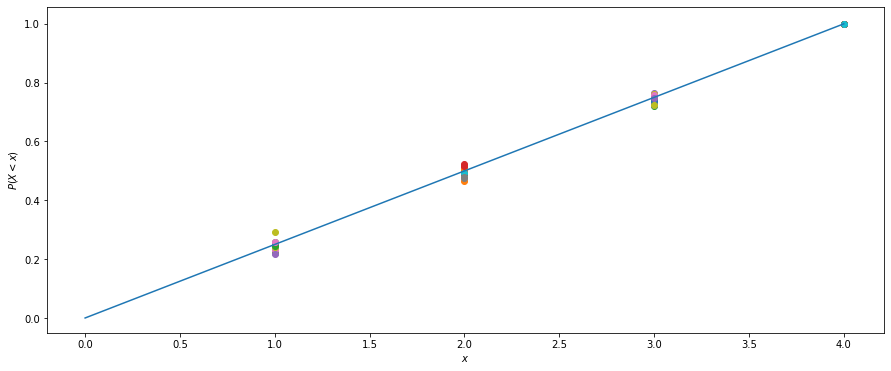

In [2]:
# Plot the CDF of a uniform distribution, along with some samples

%matplotlib inline
from matplotlib import pylab as p
import numpy as np

p.figure(figsize=(15,6))

X = np.random.uniform(0,4,(20, 1000))

for x in X:
    for y in [1,2,3,4]:
        p.scatter(y,sum(x<y)/1000)
        
p.plot([0,4],[0,1])
p.xlabel('$x$')
p.ylabel('$P(X<x)$');

#### Probability densities and common distributions

For sufficiently smooth distributions,we may write our CDF as an integral

$$P(X<z) = \int^z_{-infty} p(x) dx $$ or (basically) equivalently

$$ p(x) = \frac{dP(X<z)}{dz} $$

this $p(x)$ is the *probability density function* (PDF) of the distribution. Many well known probability distributions are in this form, including the uniform distribution over the range $(a,b)$, where $p(x) = \frac{1}{b-a}$ 

[0, 4, 0, 1.0]

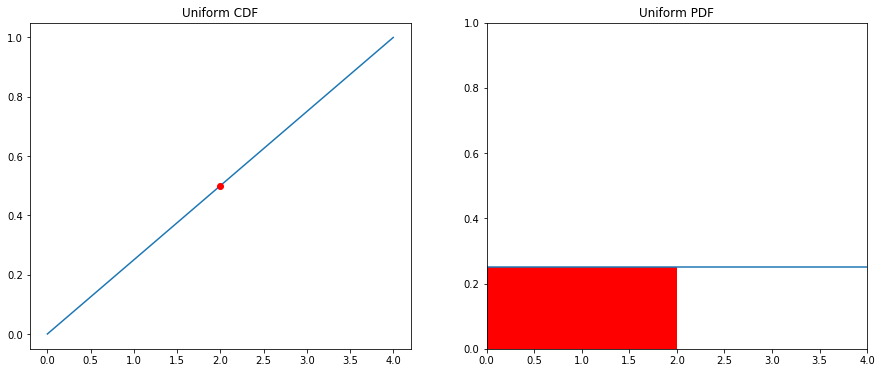

In [3]:
# Plot the CDF and PDF for the uniform distribution
p.figure(figsize=(15, 6))
# CDF
p.subplot2grid((1, 2), (0, 0))
p.plot([0, 4], [0, 1])
p.title('Uniform CDF')
p.plot([2],[0.5], 'ro')
#PDF
p.subplot2grid((1, 2), (0, 1))
p.plot([0, 4], [0.25, 0.25])
p.title('Uniform PDF')
p.fill_between([0,2], [0.25, 0.25], fc='r')
p.axis([0,4,0, 1.0])

and the Gaussian distribution (in some circumstances also called the "normal distribution"):


$$ p(x) = \frac{1}{\sqrt{2\pi}\sigma} \exp \left( - \frac{(x-\mu)^2}{2\sigma^2} \right) $$

Usually, if $X$ is a Gaussian random variable, with mean $\mu_x$ and variance $\sigma_X^2$, and $Y$ is another independent Gaussian random variable, with mean $\mu_Y$ and variance $\sigma_Y^2$, then $Z=X+Y$ also follows a Gaussian distribution, with mean $\mu_X+\mu_Y$ and variance $\sigma_X^2 +\sigma_Y^2$. While the last two properties are not a total surprise (see the section above on the algebra of random variables), it is unusual for the sum of variables from a distribution to share the same distribution.

For this reason, along with other similar ones, the normal distribution is often used as an approximation for real world data. For example, to return to our dice:

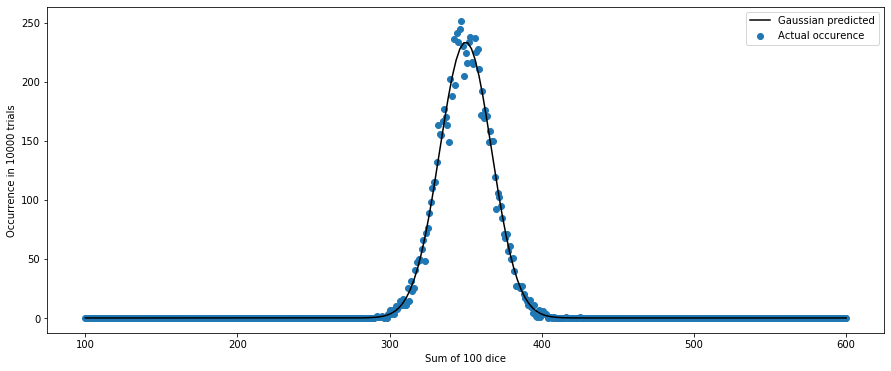

In [11]:
totals = np.zeros(501)

# we'll toss 100 dice 1000 times, summing the total each time

values = np.random.randint(0, 6, size=(10000, 100)) + 1

for v in values:
    totals[sum(v)-100] += 1
    

p.figure(figsize=(15,6))
p.scatter(range(100,601), totals, label='Actual occurence')

x = np.linspace(100, 600, 200)
p.plot(x, 10000/p.sqrt(2*p.pi*100*35/12)*p.exp(-(x-350)**2/(2*(100*35/12))), 'k', label='Gaussian predicted')
p.xlabel('Sum of 100 dice')
p.ylabel('Occurrence in 10000 trials')
p.legend();

#### Continuous expectations

The expectation formula for a continuous random variable, $X$, replaces the sum over possible discrete values with an integral over the range of possible continuous value and the probability with the PDF,

$$ E(X) = \int_{-\infty}^{\infty} x p(X=x) dx. $$
Similarly the variance is now

$$ E(X^2)-E(X)^2 =  \int_{-\infty}^{\infty} x^2 p(X=x) dx - \left( \int_{-\infty}^{\infty} x p(X=x) dx \right) $$


#### The multivariate Gaussian distribution

Let's extend our world from a one dimensional continuous random variable, $X$,  to a two dimensional one, $ \mathbf{X} = {X, Y}$. Our Cumulative distribution function now becomes a joint probability, $F_\mmathbf{X}=P(X\leq x, Y\leq y)$, where the comma should be taken as implying both the first statement *and* the second are true. Given a CDF, it's natural to look for a probability density function such that
$$ P(X\leq x, Y\leq y) = \int_{-\infty}^x \int_{-\infty}^y p_{\mathbf{X}}(x',y') dy\,dx, $$
or equivalently
$$ p_{\mathbf{X}} = \frac{\partial^2 F_\mathbf{X}}{\partial x\partial y}.$$
If the variables $X$ and $Y$ are **independent** and have probability density functions $p_X(x)$ and $p_Y(y)$, we can write

$$\begin{eqnarray*}
P(X\leq x, Y \leq y) &= P(X\leq x) P(Y\leq y),\\
&=\int^x p_X(x') dx' \int^y p_Y(y') dy',
&=\int_{-\infty}^x \int_{-\infty}^y p_X(x')p_Y(y') dy\,dx.
\end{eqnarray*}
$$

Hence for independent variables $p_{\mathbf{X}}(x,y) = p_x(x)p_y(y)$. When the variables are correlated this usually becomes more difficult. However, for Gaussian distributions we know that we have an advantage. Sums of Gaussian distributions are still Gaussian, so we can look for a comination of the $\mathbf{X}$ which happens to be independent. Define the covariance matrix of $\mathbf{X}$,

$$\mathbf{M}_\mathbf{X}:= E([\mathbf{X}-E(\mathbf{X}][\mathbf{X}-E(\mathbf{X})]) = \left(\begin{array}{cc}
\mbox{var}(X)& \mbox{cov}(X,Y)\\
\mbox{cov}(Y,X)& \mbox{var}(Y)
\end{array}
\right)
$$

we seek a matrix $\mathbf{L}$ defining a transformation, $\mathbf{Z}=\mathbf{L}\mathbf{X}$ such that the covariance matrix of $\mathbf{Z}$ is diagonal. Substituting into the definition above we find $\mathbf{M}_\mathbf{Z} = \mathbf{L}\mathbf{M}_\mathbf{X}\mathbf{L}^T$. Since $\mathbf{M}_\mathbf{X}$ is a symmetric real matrix we should know a diagonal decomposition $\mathbf{M} = \mathbf{V}\mathbf{D}\mathbf{V}^T$, where $\mathbf{V}$ is orthonormal (i.e. $\mathbf{V}^T = \mathbf{V}^T$). So we can pick $\mathbf{L} = \mathbf{V}^T$ and we are done. As a bonus the transformation has determinant equal to 1, so we don't need to fiddle with the integral and can write

$$p_\mathbf{Z}(\mathbf{z}) = \prod_{i=1}^n \frac{1}{\sqrt{2\pi\sigma_{i}^2}}\exp\left(-\frac{(z_i-\mu_i)^2\right}{\sigma_i^2})=\frac{1}{\sqrt{(2\pi)^n\mbox{\det(\mathbf(D)}}}\exp\left(\frac{(\mathbf{z}-\mathbf{\mu}_\mathbf{z})^T\mathbf{D}^{-1}(\mathbf{z}-\mathbf{\mu}_\mathbf{z})}{2}\right).$$

Substituting back into $x$ variables we get the final form,

$$p_\mathbf{X}(\mathbf{x}) = \frac{1}{\sqrt{(2\pi)^n\mbox{\det(\mathbf{M}_{\mathbf{X}}}}} \exp\left(-\frac{(\mathbf{x}-\mathbf{\mu})^T\mathbf{M}_\mathbf{X}^{-1](\mathbf{x}-\mathbf{\mu})}{2}\right).$$


## Statistical Interpolation

### Finding the time when you have two clocks

Consider a hypothetical problem where you wish to know the time and happen to be able to see two clocks. If these agree then there is no difficulty, but what if they disagree? Obviously a good guess will sit somewhere in between the times on the clocks. If you happen to know that one clock is more accurate, then your guess should probably be closer to the time shown on that clock, but how much closer?

Let's start trying to model this mathematically. We will call the real time $T_\mbox{true}$, and the times on the two clocks as $T_1$ and $T_2$. We will also define the errors $\epsilon_1$ and $\epsilon_2$,

$$\epsilon_1 = T_1 -  T_\mbox{true},$$
$$\epsilon_2 = T_2 -  T_\mbox{true}.$$

Our guess, $T_guess$ will be a linear combination of the two times,

$$T_{\mbox{guess}} = a T_1 +b T_2$$
with its own error
$$\epsilon_{\mbox{guess} = T_\mbox{guess} -T_\mbox{true}..$$  

We can view the various times, $T_1$, $T_2$ and $T_\mbox{guess}$ and their errors as random variables. Let's get some naive statistics. First the expected value of $T_\mbox{guess}$,

$$\begin{eqnarray*}
\epsilon_\mbox{guess} & (a+b-1)T_\mbox{true} + a\epsilon_1 +b\epsilon_2,\\
& = (a+b-1)T_\mbox{true} +aE(\epsilon_1)+bE(\epsilon_2).
\end{eqnarray*}
$$

Then for its variance,

$$  E(\epsilon_\mbox{guess}^2) = E \left([a\epsilon_1+b\epsilon_2]^2\right) = $$

For obvious reasons we would prefer the error in our guess to be small and unbiased (i.e. of zero mean). If the clock errors are known to be unbiased themselves, this implies that $b= 1-a$. Substituting this into the guess error variance we now have a function of the parameter $a$,

$$f(a) := E(\epsilon_\mbox{guess}^2) = a^2\sigma^2_1 + (1-a)^2 \sigma^2_2.$$

Using knowledge from previous lectures we can minimise this by find a value of $a$ such that $f'(a)=$, i.e

$$ 2a \sigma^2_1 -2(1-a)\sigma^2_2 =0,$$
or $a= \frac{\sigma^2_2}{\sigma^2_1+\sigma^2_2}$

All this implies that our best guess is

$$ T_\mbox{guess} = \frac{\sigma^2_2 T_1+\sigma_1^2 T_2}{\sigma^2_1+\sigma^2_2} $$

with an error variance

$$ E(\epsilon_{\mbox{guess}}^2)=\frac{\sigma^2_1 \sigma^2_2}{\sigma^2_1+\sigma^2_2}. $$

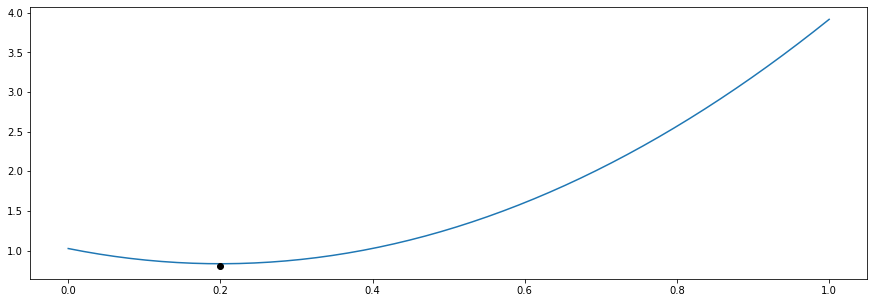

In [9]:
# We'll make the truth the zero state

T_true = 0.0


# Generate some vectors of examples

T_1 = T_true + np.random.normal(0, scale=2, size=1000)
T_2 = T_true + np.random.uniform(-np.sqrt(3),np.sqrt(3), size=1000)

def T_guess(a):
    """Function to generate zero bias """
    return a*T_1+(1-a)*T_2

x=p.linspace(0,1)
error = [np.mean((T_guess(_)-T_true)**2) for _ in x]

p.figure(figsize=(15,5))
p.plot(x, error)

p.plot(1**2/(1**2+2**2),(1**2*2**2)/(1**2+2**2),'ko');

#### Exercises

 - Prove that the value found is indeed a minimum rather than a maximum

### The optimal interpolation method


In the last case we only had observations, but often we have an existing full set of data, $\mathbf{x}_b$, referred to as the *background*, along with a limited set of observations, $mathbf{y}$, which we wish to use to improve it. In NWP (or more generally when solving a mathematical model), $\mathbf{x}_b$ will be all the variables used to make a forecast (also known as the *prognostic* variables), written as a single one dimensional vector (or array). This vector will be of some fixed length, $m$. Meanwhile the relevant observations are all written as another one dimensional vector of length $n$.

Thus far, we have made no kind of assumption about what the information in $\mathbf{x}$ (nor in$\mathbf{y}$) represent. They could be grid point values in a finite difference model, volume values in a finite volume model or coefficent parameters in a finite element or spectral model. They could even be long term mean values derived from statistical records. All that matters is that they are continuous and that there has been some kind of discretization made so that there are a finite number of them.

### The observation operator

Since the observations are related to the prognostic model variables, we will assume that there is some kind of mapping or observation operator, $H$ taking a given true state $\mathbf{x}$ and returning the observed value one would expect to see. For now we will also guess that the mapping is linear, so that it can be represented as a matrix.

As a concrete example, let the $\mathbf{x}_b$ be the surface temperatures at 4 corners of a grid square, and let the $mathbf{y}$ be two temperature measurements within it. Then assuming a bilinear interpolation

$$ y_i = \sum_{j=1}^4 \alpha(r_i, s_i)_j[\mathbf{x}_b]_j $$

and 
$$ \mathbf{H} = \left(
\begin{array}{cccc}
\alpha(r_1, s_1)_1&\alpha(r_1, s_1)_2& \alpha(r_1, s_1)_3&\alpha(r_1, s_1)_3\\
\alpha(r_2, s_2)_1&\alpha(r_2, s_2)_2& \alpha(r_2, s_2)_3&\alpha(r_2, s_2)_3
\end{array} \right).$$


Note that $\mathbf{H}$ is a $m\times n$ matrix and so not generally square.

Given our backgorund, our observations and the observation matrix $\mathbf{H}$ we can define an *innovation* vector, $mathbf{z}$ representing "new" knowledge,

$$\mathbf{z} = \mathbf{y} - \mathbf{H}\mathbf{x}_b.$$

This is another length $n$ vector telling us whether our observations were higher or lower than we would have expected them to be, given our previous forecast.

As when considering the clocks, we will make a new guess at the current state of the system, $\mathbf{x}_a$, now called an analysis, and we will assume that the new information brought in is represented by some linear combination of our innovation vector

$$\mathbf{x}_a = \mathbf{x}_b + \mathbf{W}\mathbf{z}. $$ 

At this point we will introduce a hypothetical *true* state, $\mathbf{x}_t$, as well as the (fixed) background and observation errors and the analysis error, which is a function of the weight matrix, $\mathbf{W}$,

$$\mathbf{\epsilon}_b = \mathbf{x}_b-\mathbf{x}_t, $$
$$\mathbf{\epsilon}_o = \mathbf{y}-\mathbf{H}\mathbf{x}_t, $$
$$\mathbf{\epsilon}_a = \mathbf{x}_a-\mathbf{x}_t = \mathbf{\epsilon_b}+\mathbf{W}(\mathbf{\epsilon}_o-\mathbf{H}\mathbf{\epsilon}_b). $$

In a similar manner to the clocks problem we will seek to minimise the sum of the component variances of the analysis error,

$$ f(\mathbf{W}):=E(\mathbf{\epsilon}_a^T \mathbf{\epsilon}_a) - \|E(\mathbf{\epsilon}_a)\|^2 
=  E([[\mathbf{\epsilon_b}+\mathbf{W}(\mathbf{\epsilon}_o-\mathbf{H}\mathbf{\epsilon}_b)])-\|E([\mathbf{\epsilon_b})+\mathbf{W}(E(\mathbf{\epsilon}_o)-\mathbf{H}E(\mathbf{\epsilon}_b))]\mathbf{\epsilon_b}+\mathbf{W}(\mathbf{\epsilon}_o-\mathbf{H}\mathbf{\epsilon}_b)]^T)\|^2.$$

Assuming that the background and observation errors have zero mean (so that in turn $E(\mathbf{\epsilon}_a)=0$) and taking derivatives with respect to the $\mathbf{W}$ we get a normal equation

$$ 2E((\mathbf{\epsilon}_o-\mathbf{H}\mathbf{\epsilon}_b)^T[\mathbf{\epsilon_b}+\mathbf{W}(\mathbf{\epsilon}_o-\mathbf{H}\mathbf{\epsilon}_b)])= 0.$$

taking the further assumption that the observation and background errors are uncorrelated (so that $E(\mathbf{H}\mathbf{\epsilon}_b\mathbf{\epsilon}_o^T)=0$ and introducing the notation

$$ \mathbf{B}:= E(\mathbf{\epsilon}_b\mathbf{\epsilon}_b^T),$$
$$ \mathbf{R}:= E(\mathbf{\epsilon}_o\mathbf{\epsilon}_o^T),$$
for the background and observation error covariances (size $m\times m$ and $n \times n$ respectively),
we can see (eventually) that the optimal weight matrix satisfies


$$\mathbf{W}_{\mbox{optimal}} := \mathbf{B} \mathbf{H}^T\left( \mathbf{R} + \mathbf{H}\mathbf{B}\mathbf{H}^T\right)^{-1}.$$

Note that the matrix to be inverted is of size $n \times n $, which will usually be significantly smaller that the $\mathbf{B}$ matrix. 

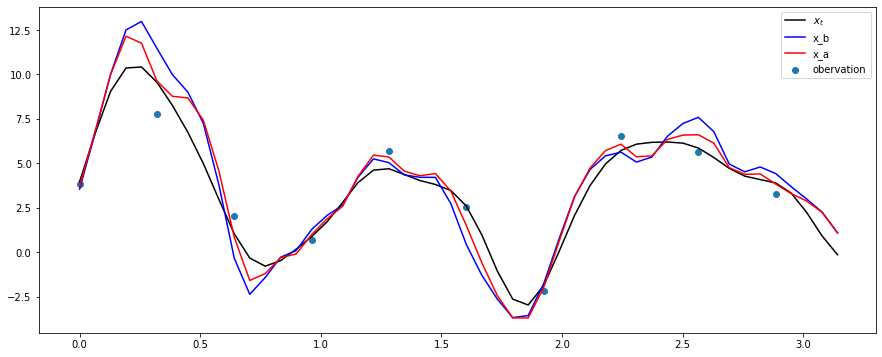

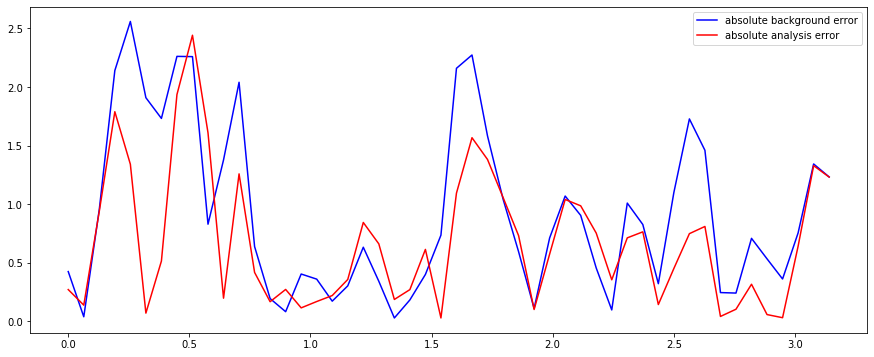

In [10]:
### Example optimal interpolation implementation & solution

### will use 1d data and errors from a known distribution

from scipy.linalg import inv


sigma_t = 2.0
sigma_b = 1.0
sigma_r = 1.0

l_t = 0.2
l_e = 0.1

s = np.linspace(0, np.pi)

e_b = np.zeros(len(s))
x_t = np.zeros(len(s))

for _ in range(len(s)):
    e_b += np.random.normal(0, sigma_b)*np.exp(-(s-s[_])**2/l_e**2)
    x_t += np.random.normal(0, sigma_t)*np.exp(-(s-s[_])**2/l_t**2)

x_b = x_t + e_b



H = np.zeros((len(s)//5, len(s)))
for _ in range(H.shape[0]):
    H[_,5*_] = 1
    
y = np.dot(H, x_t) 
y += np.random.normal(0, 1, size=(y.shape))


R = sigma_r**2*np.eye(y.shape[0])

s2 = np.broadcast_to(s, (len(s), len(s)))
B = sigma_b**2*np.exp(-(s2-s2.T)**2/l_e**2)

W = B.dot((H.T)).dot(inv(R+H.dot(B.dot(H.T))))

x_a = x_b + W.dot(y-H.dot(x_b))

p.figure(figsize=(15, 6))
p.plot(s, x_t, 'k', label='$x_t$')
p.plot(s, x_b, 'b', label='x_b')
p.scatter(s[::5], y, label='obervation')
p.plot(s, x_a, 'r', label='x_a')
p.legend()

p.figure(figsize=(15, 6))
p.plot(s, abs(x_b-x_t), 'b', label='absolute background error')
p.plot(s, abs(x_a-x_t), 'r', label='absolute analysis error')
p.legend();


We can also define the analysis error covariance matrix

$$ \mathbf{P}: = E(\mathbf{\mathbf{\epsilon}_a\mathbf{\epsilon}_a^T) = mathbf{B}-\mathbf{B}\mathbf{H}^T\mathbf{W}-\mathbf{W}^T\mathbf{H}\mathbf{B}+\mathbf{W}(\mathbf{R}+\mathbf{H}\mathbf{B}\mathbf{H}^T\mathbf{W}^T,$$

so that for the optimal choice

$$\mathbf{P} = (\mathbf{I}-\mathbf{B}\mathbf{H}^T(\mathbf{R}+\mathbf{H}\mathbf{B}\mathbf{H}^T)^{-1}\mathbf{H})\mathbf{B}.$$

#### Exercises

 - Experiment with the example OI code given above.
 
 

## The variational approach,  3D-Var

### Nonlinear observation operators

While interpolation operators are frequently linear, and thus well represented in matrix form, not all measurements are direct functions of the state variables of the model. A more general representation defines a (potentially) nonlinear *observation operator* as a function mapping the state variable values into the observation space. As a concrete example, simple anemometers measure wind speed, but not direction. Here the o  perator is

$$ h(u,v) = \sqrt(u^2 + v^2) $$

We can also define our new observation errror,
$$\mathbf{\epsilon}_o := \mathbf{y} - \mathbf{h}(\mathbf{x}_t)$$
and the linearization of $\mathbf{h}$,
$$H_{ij} := \frac{\partial h_i}{\partial x_j}$$

### Bayesian inference

Recall the identity

$P(x\cap y) = P(x\vert y)P(y) = P(y\vert x)P(x).$

This implies that, providing $P(y)\neq 0$,

$$ \tag{Bayes' theorem} P(x\vert y) = \frac{P(y\vert x) P(x)}{P(y)}.$$

If probabilities are viewed as measures of belief then this allows us to update our $posterior$ estimate of the likelihood of an event based on new information observed and our $prior$ belief of its probability. If we assume that all errors are Gaussian multivariate variables with known error covariances, then we can calculate the *a posteriori* probability density of a state $\mathbf{x}$ given observations $\mathbf{y}$ (i.e. $p(\mathbf{x}\vert \mathbf{y})$) using the density form of Bayes theorem,

$$ p(\mathbf{x}\vert \mathbf{y}) = \frac{p(\mathbf{y}\vert \mathbf{x}) p(\mathbf{x})}{p(\mathbf{y})}.$$

Here the forms of the functions of $\mathbf{x}$ in the numerator,
$$ p(\mathbf{x})= \frac{1}{\sqrt{2^m}\vert\mathbf{B}\vert}\exp(\frac{(\mathbf{x}_b-\mathbf{x})^T\mathbf{B}^{-1}(\mathbf{x}_b-\mathbf{x})}{2}),$$
$$ p(\mathbf{y}\vert\mathbf{x})= \frac{1}{\sqrt{2^n}\vert\mathbf{R}\vert}\exp(\frac{(\mathbf{y}-h(\mathbf{x}))^T\mathbf{R}^{-1}(\mathbf{y}-h(\mathbf{x}))}{2}),$$

both follow from the assumptions that the background and observation errors are multivariate Gaussian diestribution. There is no such obvious definition of $p(\mathbf{y})$, however since we are seeking an optimal $\mathbf{x}$, it is sufficient to maximize

$$\mathcal{J}(\mathbf{x}) = \exp(-\frac{(\mathbf{x}_b-\mathbf{x})^T\mathbf{B}^{-1}(\mathbf{x}_b-\mathbf{x})+(\mathbf{y}-h(\mathbf{x}))^T\mathbf{R}^{-1}(\mathbf{y}-h(\mathbf{x}))}{2}$$

as a function of $\mathbf{x}$.

In [7]:
# example 3D-Var implementation and solution

# will probably use some pseudo-weather-like 2d data and generate B from statistics.

If $h$ happens to be linear, the optimal solution which has $\nabla_\mathbf{x}\mathcal{J}=0$ satisfies

$$ \mathbf{B}^{-1}(\mathbf{\mathbf{x}_a-\mathbf{x}_b}) - \mathbf{H}^T\mathbf{R}^{-1}(\mathbf{y}-\mathbf{H}\mathbf{x}_a)=0$$

or 

$$ \mathbf{x}_a-\mathbf{x}_b = \left(\mathbf{B}^{-1}+\mathbf{H}^T\mathbf{R}^{-1}\mathbf{H}\right)^{-1}\mathbf{H}^T\mathbf{R}^{-1}[\mathbf{y}-\mathbf{H}\mathbf{x}_b] $$.

Unlikely as is may seem, this is actually the same solution as for the optimal interpolation method given above (this is a lot more trivial to prove when $\mathbf{H}$ is the identity operator).

## The Kalman Filter

### Timestepping & information propagation

So far, we have ignored the concept of time, and have assumed that all observations are valid simultaneously. In the real world, at least on the time scales on which the weather is observed and forecast, this is not usually true. One option would be to apply a "stop-start" algorithm, run our forecast model forward and then apply our existing methods from the previous section. However we can do better by remembering that some statistical information propagates forward through the model almost as easily as the state does.

Consider a system with a known "perfect", deterministic linear (forward) model $\mathbf{M}$ such that

$$\mathbf{x}^{k+1}_t = \mathbf{M}\mathbf{x}^k_t + \mathbf{c}$$

$$\mathbf{x}^{k+1}_b = \mathbf{M}\mathbf{x}^k_a +\mathbf{c}$$

Then the new background error vector also satisfies

$$\mathbf{\epsilon}_b^{k+1} = \mathbf{M}\mathbf{\epsilon}^k_a $$

and our new "background" error covariance matrix satisfies

$$\mathbf{B}^{k+1} = \mathbf{M}\mathbf{P}^k\mathbf{M}^T $$

For each timestep the update now becomes a 4 stage process

 1. Use the model to update the old analysis into the new forecast
$$ \mathbf{x}^{k+1}_b = \mathbf{M}\mathbf{x}^k_a$$
 2. USe the model to update the old analysis error covariance into the new forecast error covariance
$$\mathbf{B}^{k+1} = \mathbf{M}\mathbf{P}^k\mathbf{M}^T $$
 3. Use the observation innovations to update the forecast state into a new analysis,
$$ \mathbf{x}^{k+1}_a = \mathbf{x}^{k+1}_b + \mathbf{B}^{k+1} \mathbf{H}^T\left( \mathbf{R}^{k+1} + \mathbf{H}\mathbf{B}\mathbf{H}^T\right)^{-1} (\mathbf{y}^{k+1}-\mathbf{H}\mathbf{x}^{k+1}_b).$$
 4. Calculate the analysis error covariance.
 $$\mathbf{P} = (\mathbf{I}-\mathbf{B}\mathbf{H}^T(\mathbf{R}+\mathbf{H}\mathbf{B}\mathbf{H}^T)^{-1}\mathbf{H})\mathbf{B}.$$


## EnKF, Particle filters, wavelets, etc.


The big expense in calculating the 

## 4D-Var

The time-aware equivalent of 3D-Var. Maximize

$$\mathcal{J}(\mathbf{x_0}) = \exp\left(-\frac{(\mathbf{x}_b-\mathbf{x_0})^T\mathbf{B}^{-1}(\mathbf{x}_b-\mathbf{x}_0)+\sum_i(\mathbf{y}-h_i(\mathbf{x}(t_i))))^T\mathbf{R}_i^{-1}(\mathbf{y}-h_i(\mathbf{x}(t_i)))}{2}\right),$$
with respect to $\mathbf{x}$, subject to the constraint that $\frac{d \mathbf{x}}{dt} = \mathbf{m}(\mathbf{x})$ and $\mathbf{x}(t_0)=\mathbf{x}_0$.

*Is this mine or Stephan's? Really depends on the final timetable.*


## Reading List

- Daley - Atmospheric Data Analysis
- Kalnay - Atmospheric modeling, data assimilation and predictability
- Bennett - Inverse Modeling of the Ocean and Atmosphere